In [1]:
from epi_model.contact_based_model import integrate_contact_based_model 
from epi_model import *

In [2]:
from epi_model import contact_based_model

In [3]:
contact_based_model.__file__

'G:\\My Drive\\2020 ORGANISATION\\0. right now right now\\disease contact spread\\0 analysis\\contact_based_model.py'

In [3]:
beta = 0.00028492214857 #recovery probability
#beta = 0.00028 #recovery probability
alpha = 0.02#70 * beta #infection probability

kwargs = {
    "outbreak_origin" : 60, # choose a node between 0 and 100 (excluded)
    "verbose" : True, # progress bar using the tqdm package for jupyter notebook only
    "individual_based" : False, # choose False for individual-based framework
    "Tmax" : None, # maximum time step. Integrates the full edgelist if None
    "directed" : False # contacts in sociopatterns_ht09.csv are undirected 
}

In [4]:
t = temporalNetwork("high school")

In [6]:
%pwd

'G:\\My Drive\\2020 ORGANISATION\\0. right now right now\\disease contact spread\\0 analysis'

In [56]:
out = integrate_contact_based_model(alpha, beta, t.edgelist, **kwargs)

In [10]:
infected_CB[node]

array([0.        , 0.        , 0.        , ..., 0.07889591, 0.07887343,
       0.07885096])

In [57]:
susceptible_CB, infected_CB, recovered_CB = out
cumulative_CB = infected_CB + recovered_CB

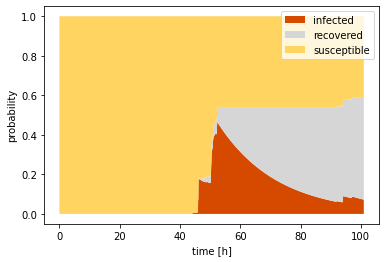

In [20]:
# observation time is determined by edgelist
# add one time step for initial condition
#Tmax = edgelist[-1,0] + 2

node = 60
time = np.arange(0, len(infected_CB[node])) * 20 / 3600. #one time step corresponds to 20s

plt.fill_between(time, 0, infected_CB[node], facecolor='#d64a00', label="infected")
plt.fill_between(time, infected_CB[node], cumulative_CB[node], facecolor="#d6d6d6", label="recovered")
plt.fill_between(time, cumulative_CB[node], 1., facecolor='#ffd460', label="susceptible")
plt.legend()
plt.ylabel("probability")
plt.xlabel("time [h]")
plt.savefig("probabilities_over_time.png")

I'm a fucking idiot... This was a probability of infection for each individual DUH
So cool then...

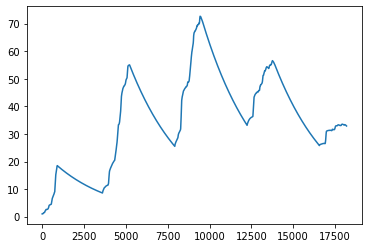

In [58]:
plt.plot( np.sum( infected_CB, axis=0 ) )

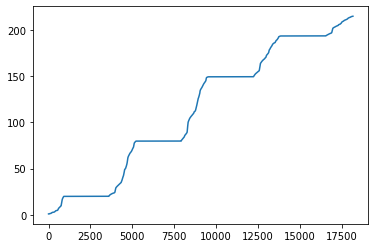

In [59]:
plt.plot( np.sum( cumulative_CB, axis=0 ) )

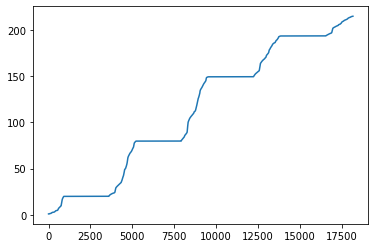

In [60]:
plt.plot( np.sum( cumulative_CB, axis=0 ) )

# my simulation

In [37]:
a = epiSim(t, alpha, beta)
eps = []

In [38]:
for i in range(100):
    a.init_attributes()
    a.infect(60)
    a.run(5)

    eps.append( a.meas['inf'] + a.meas['rec'] )

In [46]:
ep1 = np.array(eps_poo)

In [43]:
eps_poo = [ np.array(x[:len(x)//2]) + np.array(x[len(x)//2:]) for x in eps ]

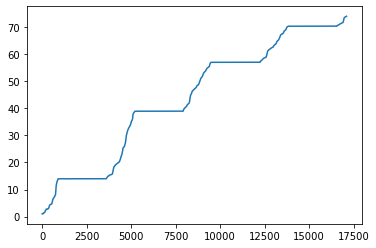

In [47]:
plt.plot( np.mean( ep1, axis=0 ) )

# gillespie

In [2]:
t = temporalNetwork("gillespie_sample")

In [11]:
a = epiSim(t, alpha, beta)
eps = []

In [12]:
for i in range(100):
    a.init_attributes()
    a.infect(choice(range(t.Nnodes)))
    a.run(5)

    eps.append( a.meas['inf'] + a.meas['rec'] )

In [13]:
ep_agg = [ np.array(x[:len(x)//2]) + np.array(x[len(x)//2:]) for x in eps ]

In [14]:
ep_agg = np.array(ep_agg)

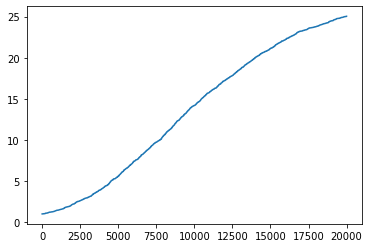

In [15]:
plt.plot( np.mean( ep_agg, axis=0 ) )

In [26]:
I_p = list(Path("TemporalGillespieAlgorithm").glob("*I_t*sampleData*"))[0].open('r').read().split("\t")
R_p = list(Path("TemporalGillespieAlgorithm").glob("*R_t*sampleData*"))[0].open('r').read().split("\t")

In [27]:
I_p = map(float, I_p[:-1])
R_p = map(float, R_p[:-1])

In [28]:
I_p = np.array(list(I_p))
R_p = np.array(list(R_p))

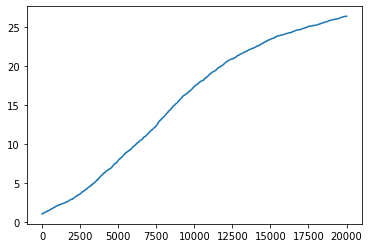

In [29]:
plt.plot(I_p+R_p)

# HOLY FUCKING SHIT OMG FUCKKKK

# LETs TRY HIGH SCHOOL DATA!

In [49]:
first = None

def transform(x):
    global first
    sp = x.split(" ")
    if not len(sp)>1:
        return ""
    
    if first is None:
        first = int(sp[0])
    
    sp[0] = str(int( sp[0] ) - first)
    
    return " ".join(sp)

# zero_out_the_file...
dta_start = Path("TemporalGillespieAlgorithm","High-School_data_2013.csv").open('r').read().split("\n")

with Path("TemporalGillespieAlgorithm","High-School-transform_data_2013.csv").open('w') as outf:
    outf.write( "\n".join( map(transform, dta_start) ) )

In [54]:
dta_start[0]

'1385982020 454 640 MP MP'

In [56]:
dta_start[-2]

'1386345580 120 285 PC PC'

In [57]:
(1386345580 - 1385982020)/20

18178.0

In [11]:
t = temporalNetwork("high school")

In [5]:
a = epiSim(t, alpha, beta)
eps = []

In [6]:
for i in range(500):
    a.init_attributes()
    a.infect(choice(range(t.Nnodes)))
    a.run(5)

    eps.append( np.array(a.meas['inf']) + np.array(a.meas['rec']) )

In [9]:
ep_agg = np.array(eps)

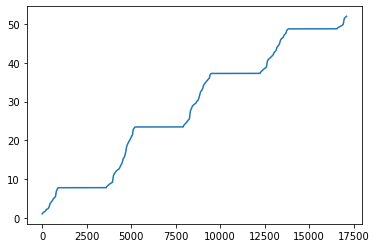

In [10]:
plt.plot( np.mean( ep_agg, axis=0 ) )

In [11]:
np.mean( ep_agg, axis=0 )[-1]

52.032

In [12]:
I_p = list(Path("TemporalGillespieAlgorithm").glob("*I_t*High-school-transform*"))[0].open('r').read().split("\t")
R_p = list(Path("TemporalGillespieAlgorithm").glob("*R_t*High-school-transform*"))[0].open('r').read().split("\t")

In [13]:
I_p = map(float, I_p[:-1])
R_p = map(float, R_p[:-1])

In [14]:
I_p = np.array(list(I_p))
R_p = np.array(list(R_p))

In [15]:
(I_p+R_p)[-1]

54.574

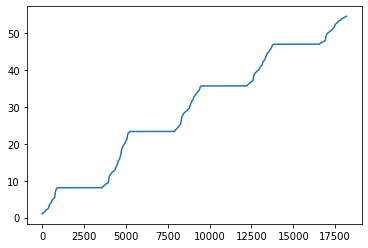

In [16]:
plt.plot(I_p+R_p)

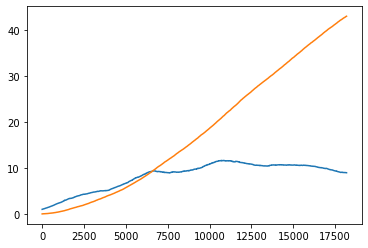

In [82]:
plt.plot(I_p)
plt.plot(R_p)

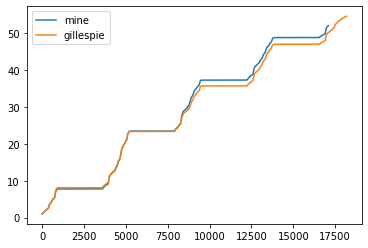

In [18]:
plt.plot( np.mean( ep_agg, axis=0 ), label='mine' )
plt.plot(I_p+R_p, label='gillespie')
plt.legend()